# Resampling

In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

## Load dataset

In [2]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2020', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [5]:
goog.index 

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=3869, freq=None)

## Resample
A common operation with time series data is resampling based on the time series index. Aggregation rule and offset alias to set refrequency are required to call .resample() method.

<pre>
Alias   Description
B   business day frequency
C   custom business day frequency
D   calendar day frequency
W   weekly frequency
M   month end frequency
SM  semi-month end frequency (15th and end of month)
BM  business month end frequency
CBM custom business month end frequency
MS  month start frequency
SMS semi-month start frequency (1st and 15th)
BMS business month start frequency
CBMS    custom business month start frequency
Q   quarter end frequency
BQ  business quarter end frequency
QS  quarter start frequency
BQS business quarter start frequency
A, Y    year end frequency
BA, BY  business year end frequency
AS, YS  year start frequency
BAS, BYS    business year start frequency
BH  business hour frequency
H   hourly frequency
T, min  minutely frequency
S   secondly frequency
L, ms   milliseconds
U, us   microseconds
N   nanoseconds
</pre>

In [6]:
goog.resample(rule='A').mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-12-31,77.061209,74.198217,75.433321,75.617206,1.822175e+07,75.617206
2005-12-31,139.973776,136.640635,138.347175,138.360933,2.145836e+07,138.360933
2006-12-31,207.433365,202.402461,205.180217,204.824916,1.704865e+07,204.824916
2007-12-31,271.072301,265.502818,268.407866,268.369305,1.091869e+07,268.369305
2008-12-31,236.284998,227.483640,232.265971,231.558071,1.269051e+07,231.558071
2009-12-31,221.164850,216.423850,218.665645,219.023214,7.044522e+06,219.023214
2010-12-31,269.464070,264.402920,267.154630,266.811472,6.383553e+06,266.811472
2011-12-31,286.110425,280.751839,283.523139,283.424738,6.179412e+06,283.424738
2012-12-31,322.927847,317.288286,320.195071,320.208021,5.228172e+06,320.208021


### Custom Aggregation functions

In [7]:
def agg(data):
    if len(data):
        return data[0]
goog.resample(rule='M').apply(agg)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-31,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-09-30,51.292744,49.648903,51.158245,49.937820,9181600.0,49.937820
2004-10-31,66.869354,64.209328,65.155777,66.042458,15196700.0,66.042458
2004-11-30,98.465927,95.277878,96.413620,97.648987,24541300.0,97.648987
2004-12-31,90.909248,89.439758,90.635277,89.643990,15787100.0,89.643990
...,...,...,...,...,...,...
2019-08-31,1234.109985,1205.719971,1214.030029,1209.010010,1698500.0,1209.010010
2019-09-30,1186.890015,1163.199951,1177.030029,1168.390015,1479900.0,1168.390015
2019-10-31,1231.229980,1203.579956,1219.000000,1205.099976,1273500.0,1205.099976


## Visualization

In [10]:
df_yearly = goog.resample('A').mean()
df_yearly

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-12-31,77.061209,74.198217,75.433321,75.617206,1.822175e+07,75.617206
2005-12-31,139.973776,136.640635,138.347175,138.360933,2.145836e+07,138.360933
2006-12-31,207.433365,202.402461,205.180217,204.824916,1.704865e+07,204.824916
2007-12-31,271.072301,265.502818,268.407866,268.369305,1.091869e+07,268.369305
2008-12-31,236.284998,227.483640,232.265971,231.558071,1.269051e+07,231.558071
2009-12-31,221.164850,216.423850,218.665645,219.023214,7.044522e+06,219.023214
2010-12-31,269.464070,264.402920,267.154630,266.811472,6.383553e+06,266.811472
2011-12-31,286.110425,280.751839,283.523139,283.424738,6.179412e+06,283.424738
2012-12-31,322.927847,317.288286,320.195071,320.208021,5.228172e+06,320.208021


Text(0, 0.5, 'Close')

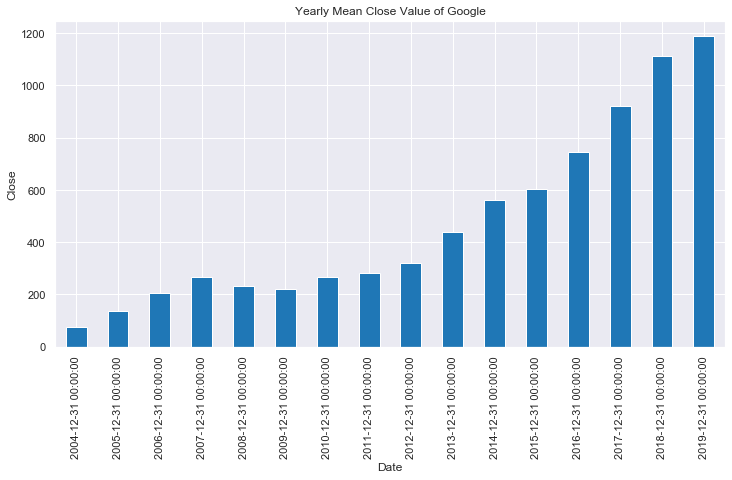

In [21]:
df_yearly['Close'].plot.bar(title ='Yearly Mean Close Value of Google',
                            figsize=(12,6),
                            color = '#1f77b6')
plt.ylabel('Close')

In [43]:
df_yearly.index = pd.to_datetime(df_yearly.index).strftime('%y-%m-%d')
df_yearly.index

Index(['04-12-31', '05-12-31', '06-12-31', '07-12-31', '08-12-31', '09-12-31',
       '10-12-31', '11-12-31', '12-12-31', '13-12-31', '14-12-31', '15-12-31',
       '16-12-31', '17-12-31', '18-12-31', '19-12-31'],
      dtype='object', name='Date')

Text(0, 0.5, 'Close')

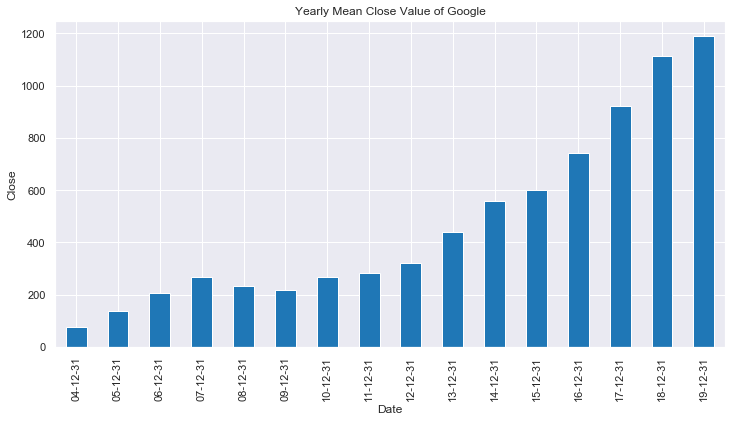

In [44]:
df_yearly['Close'].plot.bar(title ='Yearly Mean Close Value of Google',
                            figsize=(12,6),
                            color = '#1f77b6')
plt.ylabel('Close')